# Analyzing CIA World Factbook

In [9]:
import sqlite3
import pandas as pd 
conn = sqlite3.connect("factbook.db") # open connection to databa
cursor = conn.cursor() # create cursor instance

In [10]:
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn) # see table info

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [12]:
q1 = "SELECT * FROM facts LIMIT 5" # first peek at data
pd.read_sql_query(q1, conn) # print first 5 rows in table

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


# Column Names

- name - The name of the country.
- area - The total land and sea area of the country.
- population - The country's population.
- population_growth- The country's population growth as a percentage.
- birth_rate - The country's birth rate, or the number of births a year per 1,000 people.
- death_rate - The country's death rate, or the number of death a year per 1,000 people.
- area - The country's total area (both land and water).
- area_land - The country's land area in square kilometers.
- area_water - The country's water area in square kilometers.

# Initial Analysis

In [22]:
q2 = '''SELECT MAX(population) max_pop, MIN(population) min_pop,
      MAX(population_growth) max_pop_growth,
      MIN(population_growth) min_pop_growth
      FROM facts'''
pd.read_sql_query(q2, conn) # find max and min values for population & population growth

,max_pop,min_pop,max_pop_growth,min_pop_growth
0,7256490011,0,4.02,0.0


The max_pop is the population of the Earth while min_pop is 0 (impossible for a country to have a population of 0).

In [30]:
q3 = '''SELECT name, population population_zeros FROM facts
     WHERE population == (SELECT MIN(population) FROM facts)'''
pd.read_sql_query(q3, conn) # select all countries with value of 0 in population

,name,population_zeros
0,Antarctica,0


In [31]:
q4 = '''SELECT name, population population_high FROM facts
     WHERE population == (SELECT MAX(population) FROM facts)'''
pd.read_sql_query(q4, conn) # select all countries with population value of world population

,name,population_high
0,World,7256490011


Antartica is a scientific reserve per the Antartic Treaty System. There is a rotating population of ~1,000 that work in scientific research outposts on the continent. Needless to say, the world is not a country. We will ignore these rows going forward.

In [32]:
q5 = '''SELECT name, MAX(population) population_high FROM facts
     WHERE population != (SELECT MAX(population) FROM facts)'''
pd.read_sql_query(q5, conn) #find max pop without World

,name,population_high
0,China,1367485388


In [33]:
q6 = '''SELECT name, MIN(population) population_ FROM facts
     WHERE population != (SELECT MIN(population) FROM facts)'''
pd.read_sql_query(q6, conn) #find min pop without Antartica

,name,population_low
0,Pitcairn Islands,48


# Plotting Histograms

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



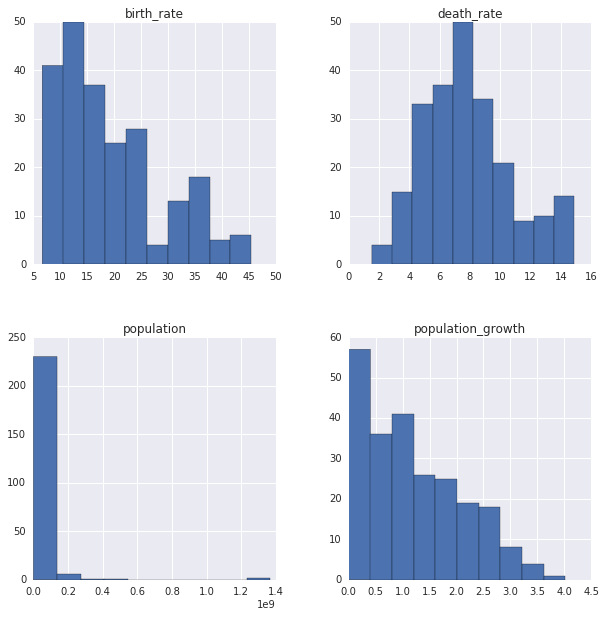

In [65]:
import matplotlib.pyplot as plt #import plotting libraries
import seaborn as sns 
%matplotlib inline 

fig = plt.figure(figsize=(10,10)) #create figure
ax = fig.add_subplot(111) #create axis instance

q7 = '''SELECT population, population_growth, birth_rate, death_rate
        FROM facts WHERE
        population != (SELECT MIN(population) FROM facts)
        AND population != (SELECT MAX(population) FROM facts)'''

x = pd.read_sql_query(q7, conn).hist(ax=ax) # plot histograms excluding outliers


# Which Countries Have the Highest Pop. Density?

In [76]:
q8 = '''SELECT name, population, area_land, (population/area_land) population_density
        FROM facts WHERE
        population != (SELECT MIN(population) FROM facts)
        AND population != (SELECT MAX(population) FROM facts)
        ORDER BY population_density DESC'''
x = pd.read_sql_query(q8, conn) #select name, population, land area, and density (pop/area)
x  #display table

,name,population,area_land,population_density
0,Macau,592731,28.0,21168.0
1,Monaco,30535,2.0,15267.0
2,Singapore,5674472,687.0,8259.0
3,Hong Kong,7141106,1073.0,6655.0
4,Gaza Strip,1869055,360.0,5191.0
5,Gibraltar,29258,6.0,4876.0
6,Bahrain,1346613,760.0,1771.0
7,Maldives,393253,298.0,1319.0
8,Malta,413965,316.0,1310.0
9,Bermuda,70196,54.0,1299.0


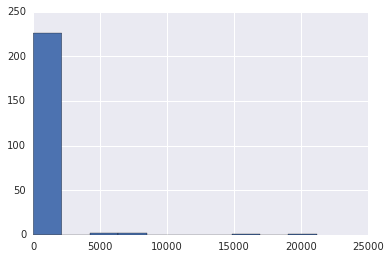

In [79]:
x['population_density'].hist()

# Which Countries Have the Highest Ratios of Water to Land?

In [87]:
q9 = '''SELECT name, area_water, area_land, (area_land/area_water) water_land_ratio
        FROM facts WHERE
        population != (SELECT MIN(population) FROM facts)
        AND population != (SELECT MAX(population) FROM facts)
        ORDER BY water_land_ratio DESC'''
pd.read_sql_query(q9, conn)

,name,area_water,area_land,water_land_ratio
0,Bosnia and Herzegovina,10.0,51187.0,5118.0
1,Niger,300.0,1266700.0,4222.0
2,Morocco,250.0,446300.0,1785.0
3,Guinea,140.0,245717.0,1755.0
4,Costa Rica,40.0,51060.0,1276.0
5,Djibouti,20.0,23180.0,1159.0
6,"Korea, North",130.0,120408.0,926.0
7,Cyprus,10.0,9241.0,924.0
8,Namibia,1002.0,823290.0,821.0
9,Burkina Faso,400.0,273800.0,684.0


# What Countries Have More Water Than Land?

In [88]:
q10 = '''SELECT name, area_water, area_land, (area_land/area_water) water_land_ratio
        FROM facts WHERE
        area_water > area_land AND
        population != (SELECT MIN(population) FROM facts)
        AND population != (SELECT MAX(population) FROM facts)
        ORDER BY water_land_ratio DESC'''
pd.read_sql_query(q10, conn)

,name,area_water,area_land,water_land_ratio
0,Virgin Islands,1564,346,0
